In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('netflix_titles.csv')

In [3]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
data = data.dropna(subset=['type', 'release_year', 'rating', 'country', 'duration'])

In [6]:
type_count = data['type'].value_counts()
type_count

type
Movie      5687
TV Show    2283
Name: count, dtype: int64

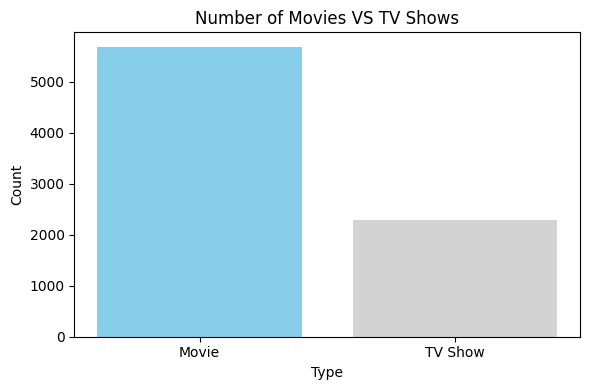

In [9]:
plt.figure(figsize = (6, 4))
plt.bar(type_count.index, type_count.values, color = ['skyblue', 'lightgray'])
plt.title('Number of Movies VS TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('1-movie-vs-tv-shows.png')
plt.show()

### Pie Chart of Content Ratings on Netflix

In [12]:
rating_counts = data['rating'].value_counts()
rating_counts

rating
TV-MA       2931
TV-14       1930
R            788
TV-PG        773
PG-13        482
PG           281
TV-Y7        236
TV-Y         227
TV-G         190
NR            80
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: count, dtype: int64

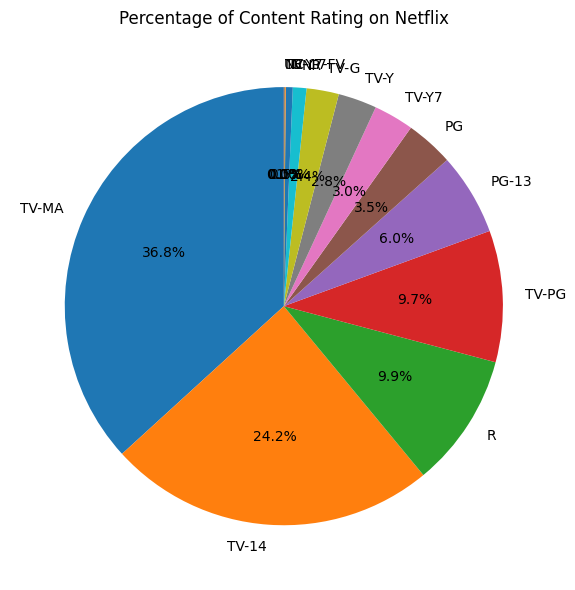

In [14]:
plt.figure(figsize = (8, 6))
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Content Rating on Netflix')
plt.tight_layout()
plt.savefig('2-content-rating-pie.png')
plt.show()

### Histogram of Distribution of Movie Durations on Netflix

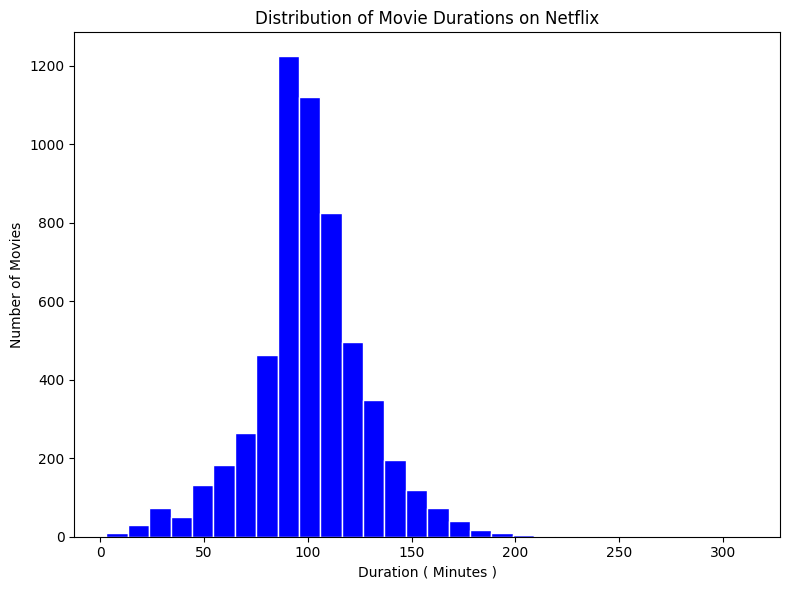

In [15]:
movie_df = data[data['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(8, 6))
plt.hist(movie_df['duration_int'], bins=30, color='blue', edgecolor='white')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration ( Minutes )')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('3-movie-duration-histogram.png')
plt.show()

### Scatter Diagram of Release Years VS Number of Shows

In [17]:
release_count = data['release_year'].value_counts().sort_index()
release_count

release_year
1942       2
1943       3
1944       3
1945       4
1946       2
        ... 
2017     965
2018    1038
2019     913
2020     852
2021     383
Name: count, Length: 73, dtype: int64

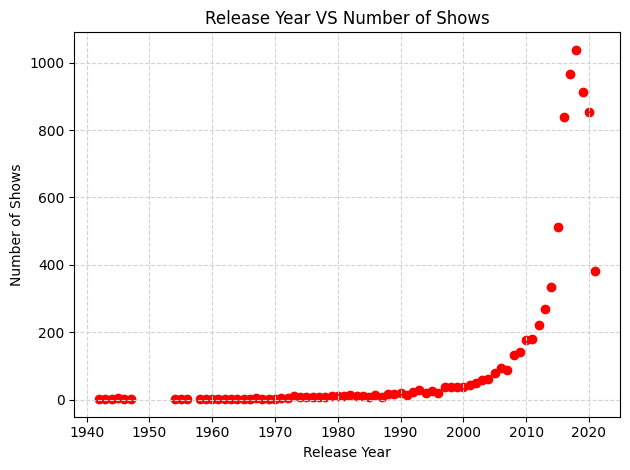

In [20]:
plt.Figure(figsize=(10, 6))
plt.scatter(release_count.index, release_count.values, color='red')
plt.title('Release Year VS Number of Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.grid(color='lightgray', linestyle='--')
plt.savefig('4-release-year-scatter.png')
plt.show()

### Bar chart of Top 10 Countries by Number of Netflix Shows

In [25]:
country_counts = data['country'].value_counts().head(10)
country_counts


country
United States     2815
India              972
United Kingdom     419
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

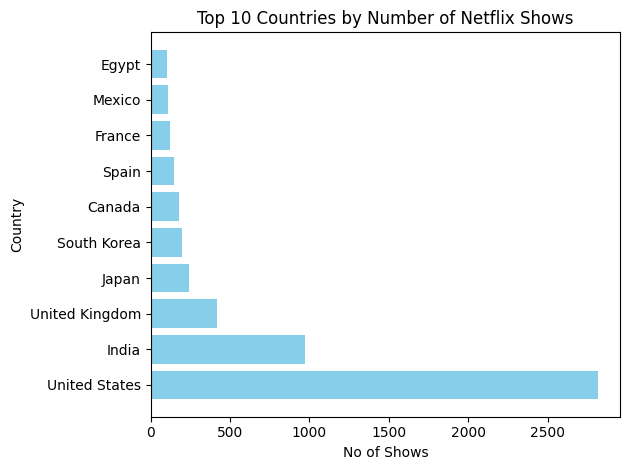

In [31]:
plt.Figure(figsize=(8, 6))
plt.barh(country_counts.index, country_counts.values, color='skyblue')
plt.title('Top 10 Countries by Number of Netflix Shows')
plt.ylabel('Country')
plt.xlabel('No of Shows')
plt.tight_layout()
plt.savefig('5-top-countries-bar.png')
plt.show()

### SubPlots of Comparison of Movies and TV Shows Released Over the Years

In [33]:
content_by_year = data.groupby(['release_year', 'type']).size().unstack().fillna(0)

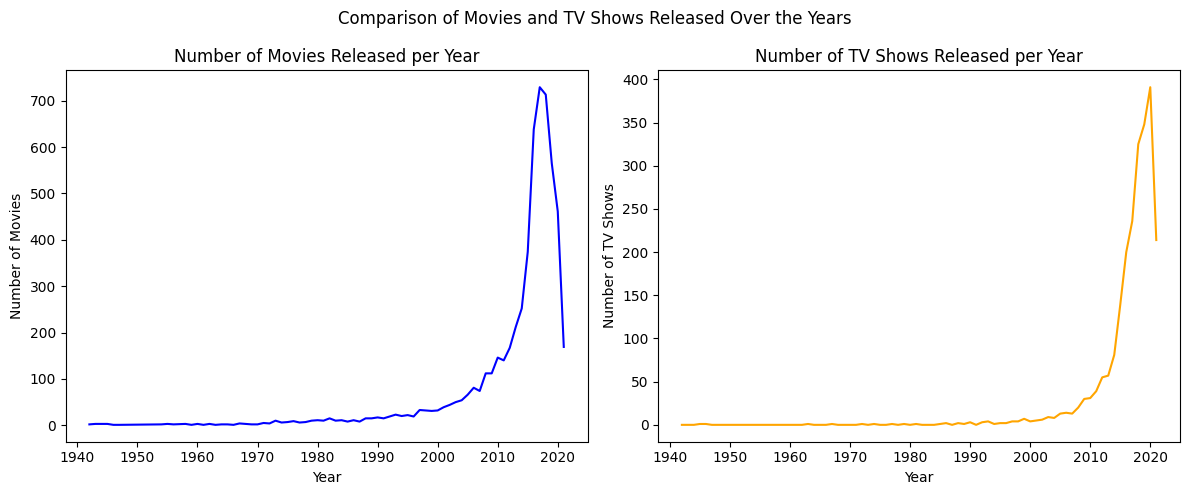

In [34]:
fig, ax = plt.subplots(1,2,figsize=(12, 5))

# first subplot for Movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Number of Movies Released per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

# second subplot for TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[1].set_title('Number of TV Shows Released per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')

fig.suptitle('Comparison of Movies and TV Shows Released Over the Years')
plt.tight_layout()

plt.savefig('6-movies-vs-tvshows-comparison.png')
plt.show()